In [10]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from pylab import rcParams

save_figures_to_latex = False
figures_path = '../../latex1/figures'     # to change if notebook is used in future exercises
folder_path = 'results' # sufficient to be folder name since its in the same folder      

In [11]:
rcParams['figure.figsize'] = 6, 3
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 1000

In [12]:
import os
import pandas as pd

txt_files = [file for file in os.listdir() if file.endswith('.csv')]

dataframes = {}
regex_pattern = r'_n_(\d+)_m_(\d+)\.txt'
for txt_file in txt_files:
    dataframe_name = os.path.splitext(txt_file)[0]  # Use the file name without extension as DataFrame name
    dataframes[dataframe_name] = pd.read_csv(txt_file, delimiter='\,', header=0, index_col=False, engine='python')  # Use the first row as column names
    dataframes[dataframe_name].reset_index()
    dataframes[dataframe_name][['n', 'm']] = dataframes[dataframe_name]['filename'].str.extract(regex_pattern).astype(int)

<AxesSubplot: xlabel='m', ylabel='time'>

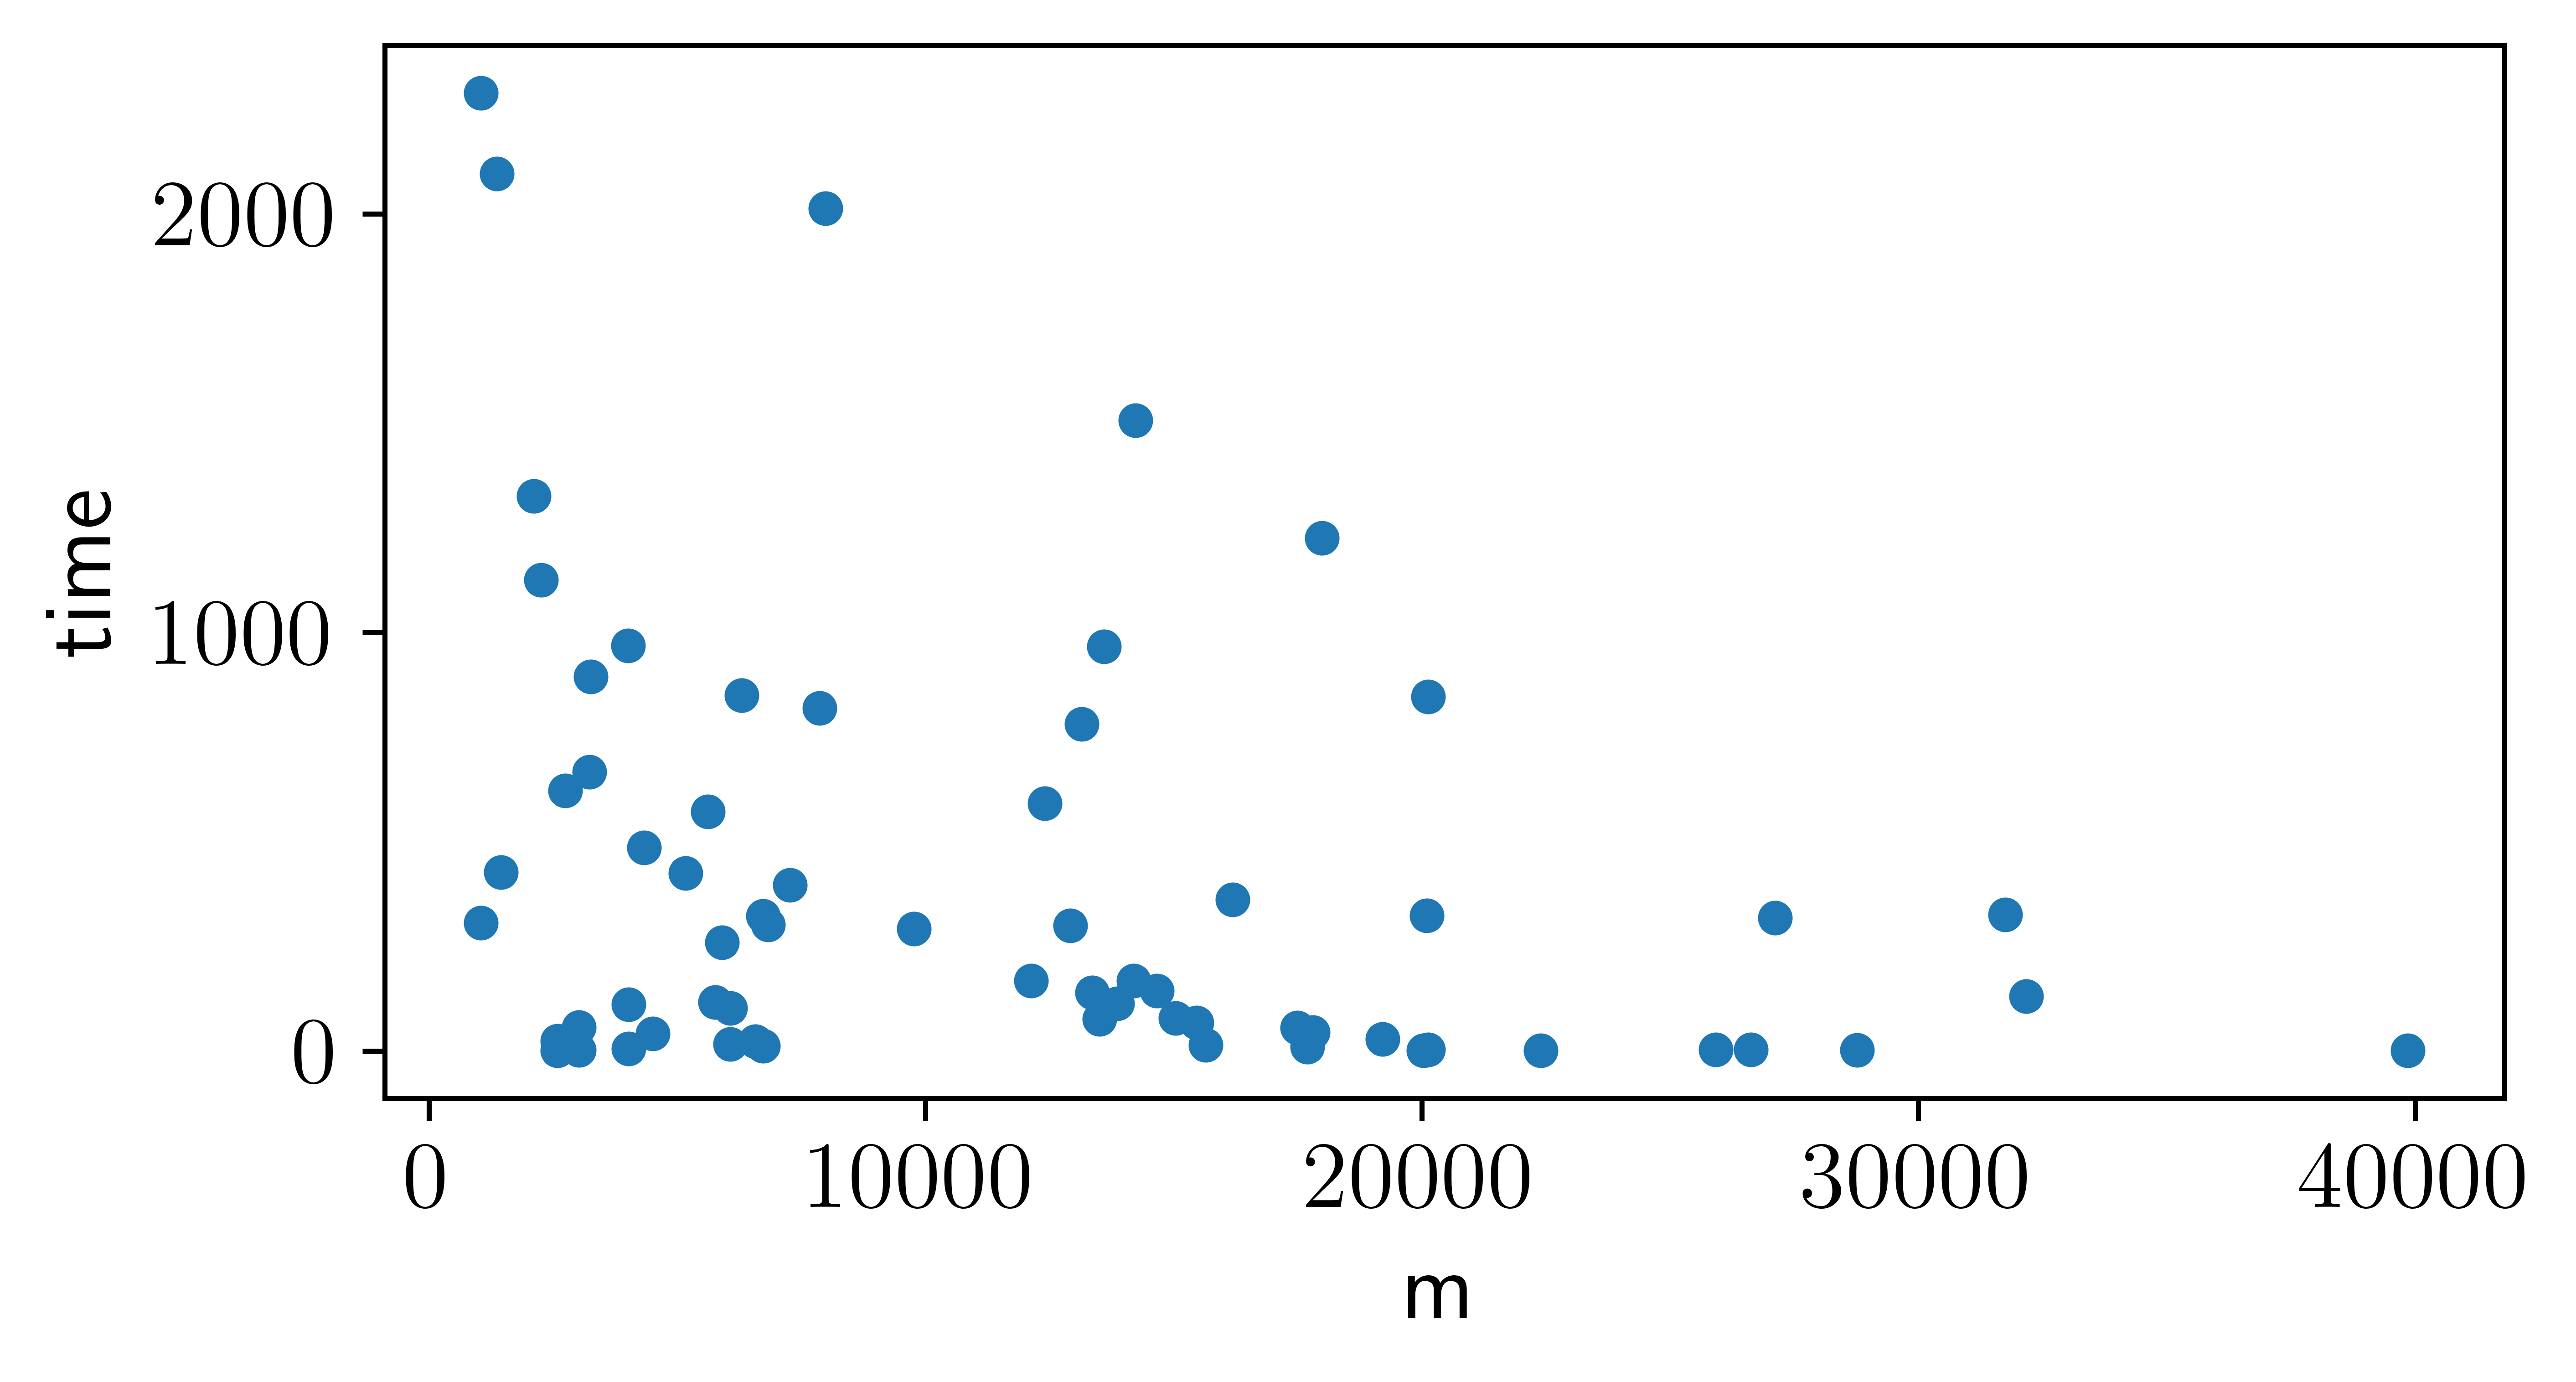

In [13]:
dataframes["full_run"].plot.scatter("m", "time")